# PREDICT 4 BDR HOUSE PRICES IN NORTH CAROLINA

In [59]:
# Import Dependencies
import pandas as pd
import numpy as np  
import csv 
import datetime as dt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#To plot the graph embedded in the notebook
%matplotlib inline

# Machine Learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
# Read in the dataset for 4 bedroom house price prediction
nc_4bdr_final = pd.read_csv('./static/data/rw_nc_4bdr_final.csv')
nc_4bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,2.160320e+05,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,3.221646e+05,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,1.612910e+05,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,2.092624e+05,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,2.822962e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,1.119684e+06,1,2536.0,216.0,83417.0,8.517350
498,Yadkinville,27055,1.691515e+05,4,14131.0,1855.0,44574.0,13.127167
499,Youngsville,27596,2.375439e+05,3,18359.0,1624.0,70535.0,8.845798
500,Zebulon,27597,2.076993e+05,5,23538.0,2995.0,58514.0,12.724106


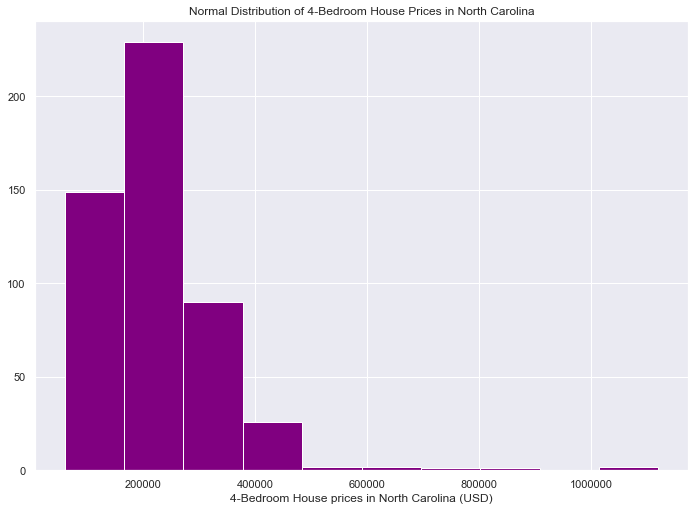

In [61]:
# Check distribution of house prices
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(nc_4bdr_final['avg_house_price'], bins=10, color="purple")
plt.xlabel("4-Bedroom House prices in North Carolina (USD)")
plt.title("Normal Distribution of 4-Bedroom House Prices in North Carolina")

plt.savefig('./static/images/PriceDistribution_4bdr.png')
plt.show()

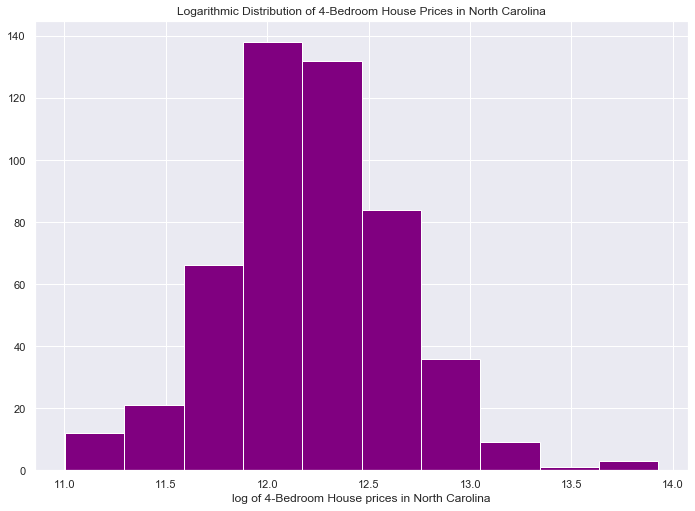

In [62]:
#Take logarithm of the target variable to normalize the distribution & make it more symmetrical
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(np.log(nc_4bdr_final['avg_house_price']), bins=10, color="purple")
plt.xlabel("log of 4-Bedroom House prices in North Carolina")
plt.title("Logarithmic Distribution of 4-Bedroom House Prices in North Carolina")
plt.savefig('./static/images/LogPriceDistribution_4bdr.png')
plt.show()

In [63]:
# Calculate measures:
print(f"Skew (Normal Distribution (4BDR)) is:", nc_4bdr_final['avg_house_price'].skew())
print(f"Kurtosis (Normal Distribution (4BDR)): %f" % nc_4bdr_final['avg_house_price'].kurt())

print(f"Skew (Logarithmic Distribution (4BDR)) is:", np.log(nc_4bdr_final['avg_house_price']).skew())
print(f"Kurtosis (Logarithmic Distribution (4BDR)): %f" % np.log(nc_4bdr_final['avg_house_price']).kurt())

Skew (Normal Distribution (4BDR)) is: 2.8304477348050656
Kurtosis (Normal Distribution (4BDR)): 15.906412
Skew (Logarithmic Distribution (4BDR)) is: 0.1532521933395278
Kurtosis (Logarithmic Distribution (4BDR)): 0.766015


In [64]:
#Creating new df to store log values of house Price
nc_4bdr_log = nc_4bdr_final
nc_4bdr_log.avg_house_price = np.log(nc_4bdr_log.avg_house_price)
nc_4bdr_log

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,12.283182,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,12.682818,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,11.990966,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,12.251344,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,12.550712,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,13.928557,1,2536.0,216.0,83417.0,8.517350
498,Yadkinville,27055,12.038550,4,14131.0,1855.0,44574.0,13.127167
499,Youngsville,27596,12.378108,3,18359.0,1624.0,70535.0,8.845798
500,Zebulon,27597,12.243847,5,23538.0,2995.0,58514.0,12.724106


In [65]:
# Created a df without price to check coorelation among features
nc_4bdr_log_explore = nc_4bdr_log[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_4bdr_log_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
498,Yadkinville,27055,4,14131.0,1855.0,44574.0,13.127167
499,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
500,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


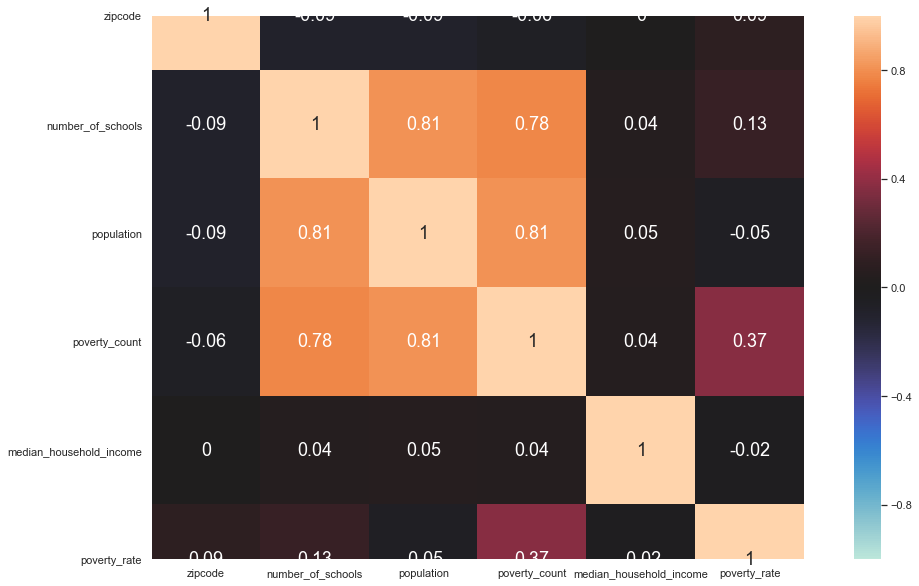

In [66]:
#check coorelation among features using seaborn library
nc_4bdr_log_corr_matrix = nc_4bdr_log_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_4bdr_log_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/LogCorrelation Matrix_4bdr.png')

# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [67]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_4bdr_log[i] = le.fit_transform(nc_4bdr_log[i])
#Dummy Variables:
nc_4bdr_log_final = pd.get_dummies(nc_4bdr_log, columns = var_mod)
nc_4bdr_log_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_492,zipcode_493,zipcode_494,zipcode_495,zipcode_496,zipcode_497,zipcode_498,zipcode_499,zipcode_500,zipcode_501
0,12.283182,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.682818,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.990966,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,12.251344,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12.550712,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,13.928557,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,12.038550,4,14131.0,1855.0,44574.0,13.127167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,12.378108,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,12.243847,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Define dependent and independent variables
X_4bdr = nc_4bdr_log_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_4bdr = nc_4bdr_log_final["avg_house_price"].values.reshape(-1,1)

In [69]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_4bdr, X_test_4bdr, y_train_4bdr, y_test_4bdr = train_test_split(X_4bdr, y_4bdr, random_state=42)

In [70]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_4bdr = LinearRegression()

In [71]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_4bdr.fit(X_train_4bdr, y_train_4bdr)
training_score_4bdr = model_4bdr.score(X_train_4bdr, y_train_4bdr)
testing_score_4bdr = model_4bdr.score(X_test_4bdr, y_test_4bdr)

# Print Scores
print(f"4 BDR Training Score: {training_score_4bdr}")
print(f"4 BDR Testing Score: {testing_score_4bdr}")

4 BDR Training Score: 1.0
4 BDR Testing Score: -2422017.8954614135


4 BDR Mean Squared Error (MSE): 521833.1029458741
4 BDR R-squared (R2 ): -2422017.8954614135


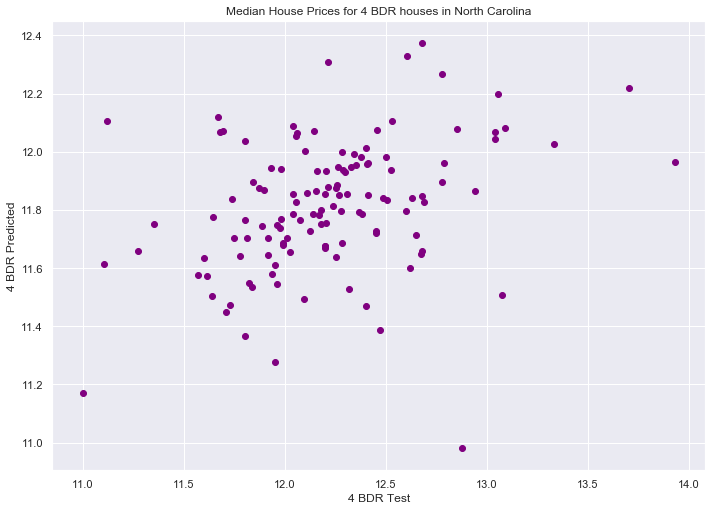

In [72]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_4bdr = model_4bdr.predict(X_test_4bdr)

# Score the predictions with mse and r2
mse_4bdr = mean_squared_error(y_test_4bdr, predicted_4bdr)
r2_4bdr = r2_score(y_test_4bdr, predicted_4bdr)
print(f"4 BDR Mean Squared Error (MSE): {mse_4bdr}")
print(f"4 BDR R-squared (R2 ): {r2_4bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_4bdr,predicted_3bdr, c="purple")

# Label plot
plt.xlabel('4 BDR Test')
plt.ylabel('4 BDR Predicted')

plt.title('Median House Prices for 4 BDR houses in North Carolina')

# Save Plot
plt.savefig('./static/images/LogLinearRegression_4bdr.png')

# Show plot
plt.show()

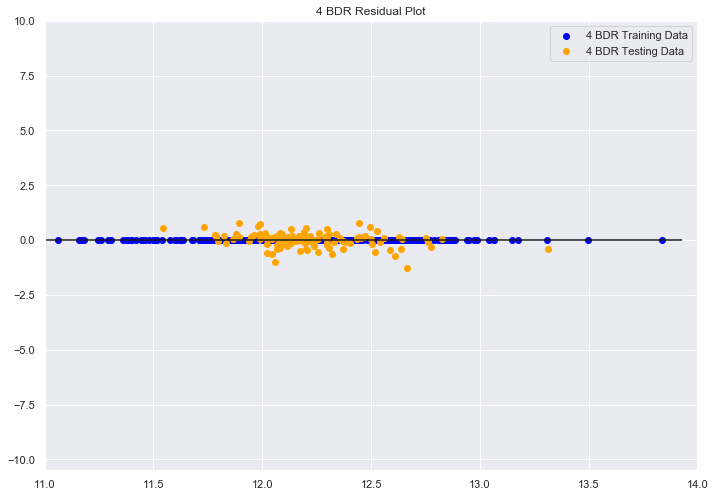

In [81]:
plt.scatter(model_4bdr.predict(X_train_4bdr), model_4bdr.predict(X_train_4bdr) - y_train_4bdr, c="blue", label="4 BDR Training Data")

plt.scatter(model_4bdr.predict(X_test_4bdr), model_4bdr.predict(X_test_4bdr) - y_test_4bdr, c="orange", label="4 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_4bdr.min(), xmax=y_4bdr.max())

plt.title("4 BDR Residual Plot")
plt.ylim(-10.5, 10)
plt.xlim(11, 14)

plt.savefig('./static/images/LogResidual Plot_4bdr.png')